How it works:

In [ ]:
from sklearn.cluster import KMeans
samples(some array)
model = KMeans(n_clusters=3)
model.fit(samples)
KMeans(algirithm='auto', ...)
labels = model.predict(samples) #we use predict model on the same sample
print(lables)

#Cluster labels for new samples

new_samples(some array)
new_labels = model.predict(new_samples)
print(new_labels)

#visualisation

import matplotlib.pyplot as plt
xs = samples[:,0]
ys = samples[:,2]
plt.scatter(xs, ys, c=labels)


In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

𝑘-means is a mathematically straightforward but computationally intensive hard-clustering method for grouping data into clusters of similar data points with similar variances. It uses a cost function called the inertia, and the algorithm tries to choose means (called centroids) that minimize the inertia.

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

In [5]:
# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

In [6]:
# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

In [7]:
# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

To make it easier to visualize our potential clusters, we will reduce the data to 2 components using PCA.

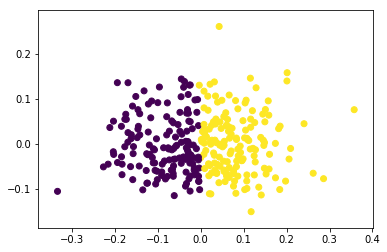

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [13]:
# Normalize the data.
X_norm = normalize(X)
# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)
# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()
# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Looks like this model isn't doing very well. We're correctly classifying 183 cases, but mis-classifying 120 of the cases!



### Now let's try MiniBatch:

In [14]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(init = 'random',
                                 n_clusters = 2,
                                batch_size = 200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0       10  145
1      139    9


- Usage, in line mode:

%timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] statement
- or in cell mode:
    
%%timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] setup_code code code...

In [15]:
%%timeit
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

21.3 ms ± 683 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%%timeit
predict_mini = minibatchkmeans.predict(X_pca)

570 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Drill: More clusters?

Your task is to take the  𝑘 -means code here and see what happens when you change the value of  𝑘 . What solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.

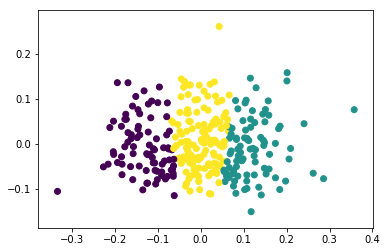

Comparing k-means clusters against the data:
col_0   0   1   2
row_0            
0      49  26  64
1      33  61  70


In [21]:
# 3 clusters
X_3pca = PCA(3).fit_transform(X_norm)
# Calculate predicted values.
y_3pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_3pca)

# Plot the solution.
plt.scatter(X_3pca[:, 0], X_3pca[:, 1], c=y_3pred)
plt.show()
# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y, y_3pred))

In [19]:
minibatchkmeans3 = MiniBatchKMeans(init = 'random',
                                 n_clusters = 3,
                                batch_size = 200)
minibatchkmeans3.fit(X_3pca)

# Add the new predicted cluster memberships to the data frame.
predict_3mini = minibatchkmeans3.predict(X_3pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_3mini, y_3pred))

Comparing k-means and mini batch k-means solutions:
col_0   0   1    2
row_0             
0       0  87   17
1      11   0  117
2      71   0    0


# Question: why do I see 3 rows? 

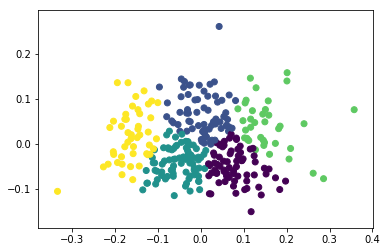

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      14  57
1      40  28
2      34  46
3      15  22
4      36  11


In [20]:
# 5 clusters
X_5pca = PCA(5).fit_transform(X_norm)
# Calculate predicted values.
y_5pred = KMeans(n_clusters=5, random_state=42).fit_predict(X_5pca)

# Plot the solution.
plt.scatter(X_5pca[:, 0], X_5pca[:, 1], c=y_5pred)
plt.show()
# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_5pred, y))